# Comparing similarity measures

In this notebook a comparison between experimental results on humans and different similarity metrics are compared. 

### Importing libraries

In [44]:
import pandas as pd
import nltk
import matplotlib
import matplotlib.pyplot as plt
import numpy


%matplotlib inline

#nltk.download('wordnet')
#nltk.download('wordnet_ic')
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet_ic

## Getting pairs of concepts and its similarity according to humans

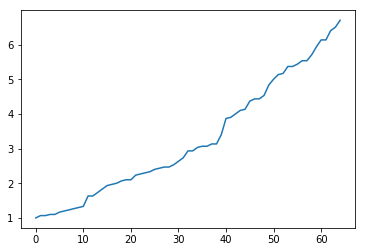

In [45]:
def PairConcepts ():
    "It obtains a list of pairs of concepts"
    df = pd.read_excel('ExperimentalResults.xlsx')
    c1 = map(str, list( df['concept 1'] ))
    c2 = map(str, list( df['concept 2'] ))
    return map(list, zip(c1,c2))

def HumanSim ():
    "It gets a list with the average similarity (assigned by humans)"
    df = pd.read_excel('ExperimentalResults.xlsx')
    return map(lambda x: round(float(x), 3) , list( df['average']))

PConcepts = PairConcepts()
Hum_Sim = HumanSim()

# Plotting
plt.plot(Hum_Sim)

# FALTA FORMATO... 

## HD Computing similarity

End of initialization
End of encoding
[0.061, 0.018, 0.0, 0.004, 0.015, 0.051, 0.04, 0.001, 0.033, 0.017, 0.109, 0.015, 0.063, 0.134, 0.022, 0.068, 0.176, 0.012, 0.057, 0.11, 0.059, 0.014, 0.056, 0.102, 0.108, 0.015, 0.089, 0.093, 0.022, 0.104, 0.066, 0.093, 0.071, 0.237, 0.181, 0.103, 0.15, 0.062, 0.127, 0.058, 0.146, 0.174, 0.133, 0.12, 0.136, 0.21, 0.21, 0.219, 0.202, 0.262, 0.091, 0.132, 0.205, 0.147, 0.215, 0.19, 0.12, 0.311, 0.168, 0.189, 0.253, 0.179, 0.196, 0.343, 0.341]


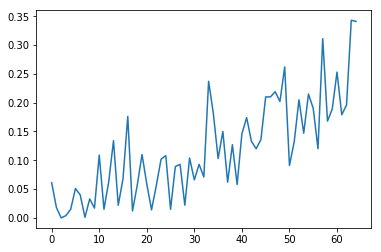

In [46]:
%run KB_HDComputing.ipynb

# Initializing Memory
Init_mem()

#Comparing pairs of concepts
HD_sim = []
for cc in PConcepts:
    HD_sim.append( HDvector.dist(Dict[cc[0]].getPointer(), Dict[cc[1]].getPointer()) )
    
#Normalizing...
HD_sim = map(lambda x: round(1. - x/float( max(HD_sim)) , 3), HD_sim)

print HD_sim

# Plotting
plt.plot(HD_sim)

## McRae similarity

The following cells consult the similarity for each pair of concepts in the distance matrix provided.

[0.134, 0.0, 0.0, 0.0, 0.0, 0.306, 0.03, 0.0, 0.0, 0.0, 0.104, 0.0, 0.017, 0.514, 0.0, 0.031, 0.159, 0.0, 0.026, 0.158, 0.035, 0.0, 0.039, 0.202, 0.149, 0.0, 0.093, 0.222, 0.0, 0.325, 0.022, 0.082, 0.037, 0.336, 0.377, 0.121, 0.138, 0.02, 0.29, 0.044, 0.149, 0.477, 0.323, 0.284, 0.17, 0.425, 0.425, 0.35, 0.323, 0.395, 0.119, 0.374, 0.715, 0.227, 0.405, 0.34, 0.192, 0.546, 0.382, 0.511, 0.546, 0.204, 0.319, 0.411, 0.62]


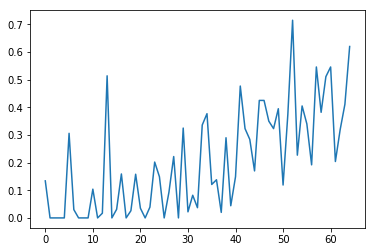

In [72]:
def McRae_simi (pair_concepts):
    "Given a pair of concepts (in a list) it consults the similarity from the cos_matrix... file"
    try: 
        df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','1st_200')
        return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]
    except:
        try:
            df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','2nd_200')
            return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]
        except:
            df = pd.read_excel(pathh + 'cos_matrix_brm_IFR.xlsx','last_141')
            return list(df.loc[df['CONCEPT'] == pair_concepts[0]][pair_concepts[1]])[0]


# Loop over all pairs...
McRae_sim = []
for cc in PConcepts:
    McRae_sim.append( McRae_simi(cc) )

print McRae_sim
plt.plot(McRae_sim)

In [ ]:
# COMPARAR AQUI CONTRA LOS DE NLTK...
# DAR FORMATO A GRAFICAS...
# CORRELACIÓN...
